# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

## What we are doing and why:

**What:** Clean and tidy our data so that it is ready for exploration, analysis and modeling

**Why:** Set ourselves up for certainty! 

    1) Ensure that our observations will be sound:
        Validity of statistical and human observations
    2) Ensure that we will not have computational errors:
        non numerical data cells, nulls/NaNs
    3) Protect against overfitting:
        Ensure that have a split data structure prior to drawing conclusions

In [77]:
# ------------

## High level Roadmap:

#### **Input:** An aquired dataset (One Pandas Dataframe) ------> **Output:** Tidied and cleaned data split into Train,  Validate, and Test sets (Three Pandas Dataframes)

#### **Processes:** Summarize the data ---> Clean the data ---> Split the data

## Summarize

In [78]:
# imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

In [80]:
# Grab our acquired dataset:

In [81]:
df = acquire.get_titanic_data()

In [82]:
# take a look at our data:

In [83]:
df.shape

(891, 13)

In [84]:
df.head(5)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [85]:
# takeaways from df head:
# survived is our target -- it is not a potential feature
# passenger_id is refering to index, it is inadvisable to keep
#pclass and class appear to be the same, one is string other is numeric.
# embark is just the first initial of embark_town.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,891.0,445.000000,257.353842,0.00,222.5000,445.0000,667.5,890.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


In [88]:
num_cols = df.columns[[df[col].dtype != 'O' for col in df.columns]]


In [89]:
# check
num_cols

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

In [90]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]

In [91]:
obj_cols

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

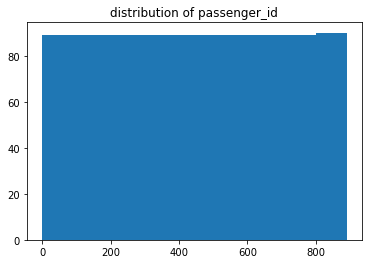

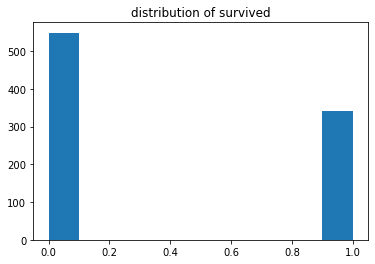

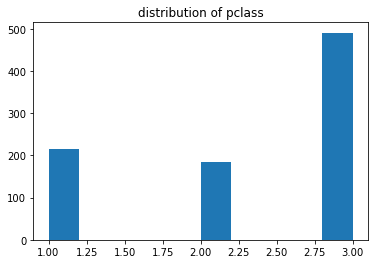

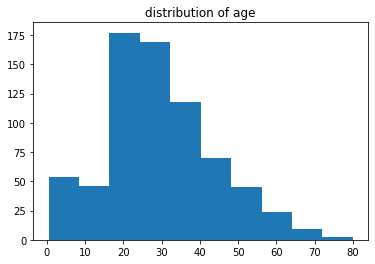

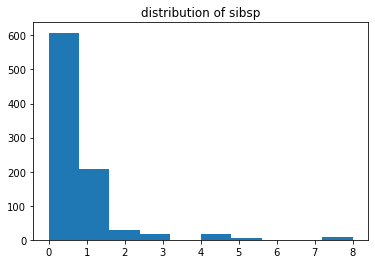

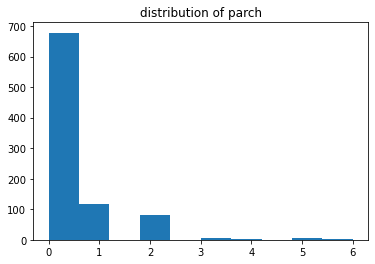

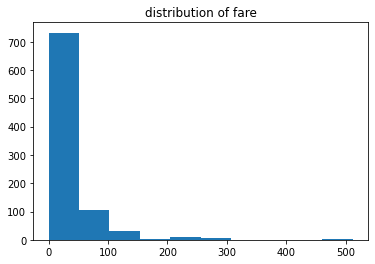

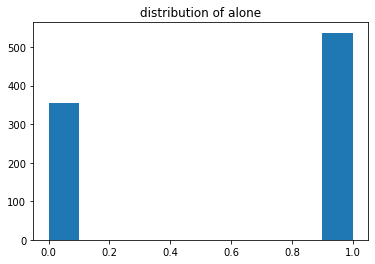

In [92]:
for col in num_cols:
    plt.hist(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [93]:
# Describe our object columns:
for col in obj_cols:
    print(df[col].value_counts())
    print('---------------')
    print(df[col].value_counts(normalize =True, dropna = False))
    print('---------------')

male      577
female    314
Name: sex, dtype: int64
---------------
male      0.647587
female    0.352413
Name: sex, dtype: float64
---------------
S    644
C    168
Q     77
Name: embarked, dtype: int64
---------------
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
---------------
Third     491
First     216
Second    184
Name: class, dtype: int64
---------------
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
---------------
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
---------------
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
---------------
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
---------------
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_to

In [94]:
# missing values:

In [95]:
missing = df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

#### Gather our takeaways, i.e., what we are going to do when we clean:

1. embarked == embark_town. Pick one to keep since they are dupicates.  We'll keep embarked_town for now since it is more human readable.

2. class == pclass.  They say the same thing, so let's keep the one that is numerical.

3. deck and age have many missing values.  Deck will be of no use to us with that many missing values and we will say the same of age without more insight. We will drop these columns.

4. We have just two values missing from embark_town, and we will fill these in with the most common embark_town category

5. For embark_town and sex, we will encode the values

In [96]:
# safety measure, alternatively df = df.drop_duplicates()
df.drop_duplicates(inplace = True)


In [97]:
# see if anything was dropped
df.shape

(891, 13)

In [98]:
# drop our columns:
columns_to_drop = ['age', 'deck', 'embarked', 'class']

In [99]:
df =df.drop(columns = columns_to_drop)

In [100]:
#new table with dropped columns and removed duplicates
df.shape

(891, 9)

In [101]:
# need to encode values to embark town and sex columns.

## Clean

In [102]:
# drop duplicates...run just in case
# did this previously in cells above

In [103]:
# drop columns with too many missing to have any value right now
# did this as well.

We could fill embark_town with most common value, 'Southampton', by hard-coding the value using the fillna() function, as below. Or we could use an imputer. We will demonstrate the imputer *after* the train-validate-test split. 

In [104]:
#need to fill row missing values in embark_town

In [105]:
df['embark_town'] = df.embark_town.fillna(value = 'Southampton') # southhampton is over 70%

In [106]:
dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True]) # takes data and turns into seperate columns

In [76]:
#rows: r0ws
#cols: cols, way to remember axis!
df = pd.concat([df,dummy_df], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sex                      891 non-null    object 
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embark_town              891 non-null    object 
 8   alone                    891 non-null    int64  
 9   sex_male                 891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 72.2+ KB


In [111]:
# need to incode sex and embark_town
df= acquire.get_titanic_data()

In [ ]:
# Let's make that into a function so we can repeat it all easily in one step.

Create a function to perform these steps when we need to reproduce our dataset. 

In [129]:
def clean_titanic_data(df):
    '''
    takes in a df of the titanic dataset as it is acquired and returns a cleaned df
    arguements: df: a pandas df with the expected feature names and coliumns return: 
    clean_df: a dataframe with the cleaning operations performed on it
    '''
    df = df.drop_duplicates()
    df = df.drop(columns = ['deck', 'embarked', 'class', 'age'])
    # comback to na invlolving southhampton
    df['embark_town'] = df.embark_town.fillna(value = 'Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first = [True, True]) # returns a dataframe which is encoded version of those two columns.
    df = pd.concat([df,dummy_df], axis =1)
    return df.drop(columns =['sex','embark_town'])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [131]:
cleaned_df_v0 = clean_titanic_data(df)
cleaned_df_v0

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,0,71.2833,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1
3,3,1,1,1,0,53.1000,0,0,0,1
4,4,0,3,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,13.0000,1,1,0,1
887,887,1,1,0,0,30.0000,1,0,0,1
888,888,0,3,1,2,23.4500,0,0,0,1
889,889,1,1,0,0,30.0000,1,1,0,0


In [132]:
cleaned_df_v0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_male                 891 non-null    uint8  
 8   embark_town_Queenstown   891 non-null    uint8  
 9   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 58.3 KB


## Train, Validate, Test Split

In [ ]:
# pt1 20% test, 80% train_validate
# pt2 then of the 80% train_validate: 30% validate, 70% train. 

#can call sk learn as a function!!
#have option on test_size = 0.2 
# stick with random state number.
# stratify = classifier, will keep distributed equally. regression wont use this.

In [134]:
# pt1 20% test, 80% train_validate
# pt2 then of the 80% train_validate: 30% validate, 70% train. 

train, test  = train_test_split(cleaned_df_v0, test_size = 0.2, random_state = 1349, stratify = cleaned_df_v0.survived)#pt1
train, validate = train_test_split(train, train_size = 0.7, random_state = 1349, stratify = train.survived) #pt2: splitting the train her to hget the validate

## Option for Missing Values: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.  

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent'). 
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object. 
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified

In [ ]:
#telling the computer to look at the categories in this variable look for the one which occurs most frquently and replace those nulls 
#with this value.

In [ ]:
# follow three basic steps: create, fit, and transform!!!

1. Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (`mean`, `median`, `most_frequent`). Essentially, this is creating the instructions and assigning them to a variable we will reference.  

In [141]:
imputer = SimpleImputer(strategy = 'most_frequent',missing_values = None)

In [142]:
type(imputer)

sklearn.impute._base.SimpleImputer

2. `Fit` the imputer to the columns in the training df.  This means that the imputer will determine the `most_frequent` value, or other value depending on the `strategy` called, for each column.   

In [143]:
# tell imputer what to do we fit it!!!, once fit we transform
imputer= imputer.fit(train[['embark_town']])

KeyError: "None of [Index(['embark_town'], dtype='object')] are in the [columns]"

3. It will store that value in the imputer object to use upon calling `transform.` We will call `transform` on each of our samples to fill any missing values.  

In [155]:
train[['embark_town']]= imputer.fit_transform(train[['embark_town']])
validate[['embark_town']]= imputer.transform(validate[['embark_town']])
test[['embark_town']]= imputer.transform(test[['embark_town']])

KeyError: "None of [Index(['embark_town'], dtype='object')] are in the [columns]"

Create a function that will run through all of these steps, when I provide a train and test dataframe, a strategy, and a list of columns. 

In [144]:
def impute_mode():
    '''
    impute mode for embark_town
    '''
    imputer = SimpleImputer(strategy = 'most_frequent',missing_values = None)
    train[['embark_town']]= imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']]= imputer.transform(validate[['embark_town']])
    test[['embark_town']]= imputer.transform(test[['embark_town']])
    return train, validate, test

#here replacing null with freuqent values.


Blend the clean, split and impute functions into a single prep_data() function. 

In [152]:
def prep_titanic_data(df):
    '''
    takes in a df of the titanic dataset as it is acquired and returns a cleaned df
    arguements: df: a pandas df with the expected feature names and coliumns return: 
    clean_df: a dataframe with the cleaning operations performed on it
    return train, test, split: three dataframes with the cleaning operation performed on them
    '''
    df = df.drop_duplicates()
    df = df.drop(columns = ['deck', 'embarked', 'class', 'age'])
    train, test  = train_test_split(cleaned_df_v0, test_size = 0.2, random_state = 1349, stratify = cleaned_df_v0.survived)#pt1
    train, validate = train_test_split(train, train_size = 0.7, random_state = 1349, stratify = train.survived) #pt2: splitting the train her to hget the validate
# print(train.info())
    
# return train , validate, test
    train, validate, test = impute_mode(train, validate, test)
    dummy_train = pd.get_dummies(train[['sex', 'embark_town']], drop_first = [True, True]) # returns a dataframe which is encoded version of those two columns.
    dummy_validate = pd.get_dummies(validate[['sex', 'embark_town']], drop_first = [True, True]) # returns a dataframe which is encoded version of those two columns.
    dummy_test = pd.get_dummies(test[['sex', 'embark_town']], drop_first = [True, True]) # returns a dataframe which is encoded version of those two columns.
    train = pd.concat([train,dummy_train], axis =1)
    validate = pd.concat([validate,dummy_validate], axis =1)
    test = pd.concat([test,dummy_test], axis =1)
    

    train[['embark_town']]= imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']]= imputer.transform(validate[['embark_town']])
    test[['embark_town']]= imputer.transform(test[['embark_town']])
    train,validate, test = impute_mode(train, validate, test)
    
    train = train.drop(columns = ['deck', 'embarked', 'class', 'age'])
    validate = validate.drop(columns = ['deck', 'embarked', 'class', 'age'])
    test = test.drop(columns = ['deck', 'embarked', 'class', 'age'])
    
    return train, validate, test
    
    
    

In [153]:
df = acquire.get_titanic_data()

In [154]:
train, validate, test = prep_titanic_data(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 474 to 94
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   survived                 498 non-null    int64  
 2   pclass                   498 non-null    int64  
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 32.6 KB
None


TypeError: impute_mode() takes 0 positional arguments but 3 were given

## Exercises

The end product of this exercise should be the specified functions in a python script named `prepare.py`.
Do these in your `classification_exercises.ipynb` first, then transfer to the prepare.py file. 

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data:  

1. Use the function defined in `acquire.py` to load the iris data.  

1. Drop the `species_id` and `measurement_id` columns.  

1. Rename the `species_name` column to just `species`.  

1. Create dummy variables of the species name. 

1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.  

### 1.) Use the function defined in acquire.py to load the iris data.

In [10]:
df = acquire.get_iris_data()

In [11]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [9]:
df.columns

Index(['species_id', 'species_name', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width'],
      dtype='object')

### 2.) Drop the species_id and measurement_id columns.

In [12]:
df = df.drop_duplicates()
df = df.drop(columns = ['species_id'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_name  149 non-null    object 
 1   sepal_length  149 non-null    float64
 2   sepal_width   149 non-null    float64
 3   petal_length  149 non-null    float64
 4   petal_width   149 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.head(10)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


### 3.) Rename the species_name column to just species.

In [17]:
df = df.rename(columns={"species_name": "species"})

In [32]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 4.) Create dummy variables of the species name.

In [35]:
dummy_species_name = pd.get_dummies(df[['species']]) 
dummy_species_name.T

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,143,144,145,146,147,148,149
species_setosa,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
species_versicolor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
species_virginica,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


### 5.) Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [36]:
df = acquire.get_iris_data()

In [37]:
def prep_iris(df):
    '''
    takes in a df of the iris dataset as it is acquired and returns a cleaned df
    arguements: df: a pandas df with the expected feature names and columns return: 
    clean_df: a dataframe with the cleaning operations performed on it
    '''
    df = df.drop_duplicates()
    df = df.drop(columns = ['species_id'])
    df = df.rename(columns={"species_name": "species"})
    dummy_species_name = pd.get_dummies(df[['species']]) 
    return df
    

## Bonus

- 2.1  Use the function you defined in acquire.py to load the titanic dataset.
- 2.2  Handle the missing values in the embark_town and embarked columns.
- 2.3  Remove the deck column.
- 2.4  Create a dummy variable of the embarked column.
- 2.5  Split Data
- 2.5.1  Create a helper function to split titanic data into train, validate, test datasets
- 2.6  Fill or impute the missing values in age.
- 2.6.1  Build a helper function for imputing
- 2.7  Create a prep_titanic function that accepts the untransformed titanic data and returns the data with the transformations above applied.

In [41]:
#.) 2.1 Use the function you defined in acquire.py to load the titanic dataset.

In [38]:
df = acquire.get_titanic_data()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [40]:
missing = df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64